In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [37]:
def GetNewtonMethod(f,df,xn,itmax = 100000, precision=1e-12):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
        
        except ZeroDivisionError:
            print("zero division")
            
        xn  = xn1
        it += 1
    
    
    if it == itmax:
        return False
    else:
        return xn
    
def GetAllRootsLaguerre(f,df,n, tolerancia=9):
    
    Roots = np.array([])
    x_lim = 100
    
    while len(Roots) != n:

        x_lim += 300
        x = np.linspace(0,x_lim,x_lim)

    
    
    
        for i in x:
        
            root = GetNewtonMethod(f,df,i)
          
            if root != False:
            
                croot = np.round( root, tolerancia ) 
            
                if croot not in Roots:
                    Roots = np.append( Roots, croot )
                
        Roots.sort()

    return Roots

In [28]:
def GetLaguerre(n):
    
    x = sym.Symbol('x',Real=True)
    y = sym.Symbol('y',Real=True)
    
    y = sym.exp(-x)*x**n
    
    p = sym.exp(x)*sym.diff(y,x,n)/(np.math.factorial(n))
    
    return p

$$ \int_{0}^{\infty} \frac {x^3}{e^x - 1} dx $$

In [96]:
X = sym.Symbol('x',Real=True)
fun = lambda x: (x**3)/((np.e**x) - 1)
dfun = sym.diff(fun(X),X)
g = lambda x: ((x**3)/((np.e**x) - 1))*np.e**x
n = 3

In [98]:

def GaussLaguerre(fun, dfun, X, g, n):
    p3 = GetLaguerre(n)
    dp3 = sym.diff(p3,X)

    f = sym.lambdify([X],p3, 'numpy')
    df = sym.lambdify([X],dp3, 'numpy')

    Roots = (GetAllRootsLaguerre(f,df,n))

    p4 = GetLaguerre(n+1)
    p_4 = sym.lambdify([X],p4, 'numpy')
    
    
    weights = []

    for i in range(len(Roots)):
        w = Roots[i]/(((n+1)**2) * (p_4(Roots[i])**2))
        weights.append(w)
        
    int_ = 0
    for i in range(len(weights)):
        int_ += weights[i]*g(Roots[i])
        
    return int_

In [113]:
int_ = GaussLaguerre(fun,dfun,X,g,n)
int_

6.481130172997595

In [114]:
points = [2,3,4,5,6,7,8,9,10]
weight_n = []

for i in points:
    weight_n.append(GaussLaguerre(fun,dfun,X,g,i)/int_)

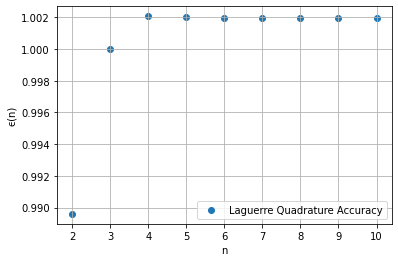

In [115]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.scatter(points,weight_n, label='Laguerre Quadrature Accuracy')
plt.xlabel('n')
plt.ylabel('ϵ(n)')

plt.grid()
plt.legend()